<a href="https://colab.research.google.com/github/eriksonsantos/fuzzy-control/blob/main/fuzzy_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

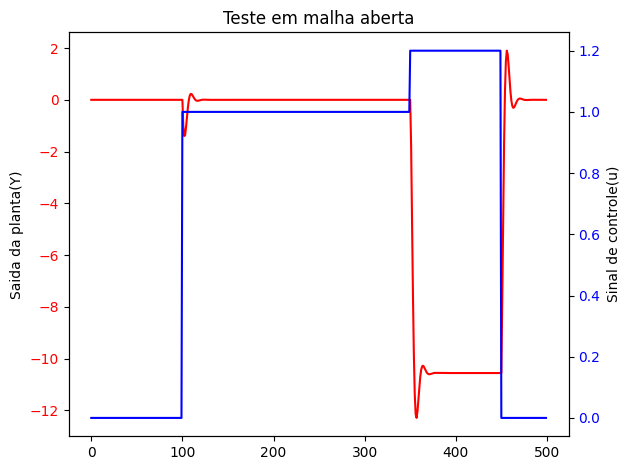

In [ ]:
k = 500
u = np.zeros(k)
for x in range(k):
  if x < 100:
    u[x] = 0
  elif x < 350:
    u[x] = 1
  elif x < 450:
    u[x] = 1.2
  else:
    u[x] = 0

y = np.zeros(k)
for x in range(k):
  y[x] =1.4* y[x-1] - 0.6* y[x-2] - 3*u[x-1]**3 + 2*u[x-1] - u[x-2]**3 + 2*u[x-2];

fig, ax1 = plt.subplots()
ax1.plot(y, color='r')
ax1.set_ylabel('Saida da planta(Y)')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.plot(u,color='b')
ax2.set_ylabel('Sinal de controle(u)')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Teste em malha aberta')
fig.tight_layout()
plt.show()

In [ ]:
pip install scikit-fuzzy

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control

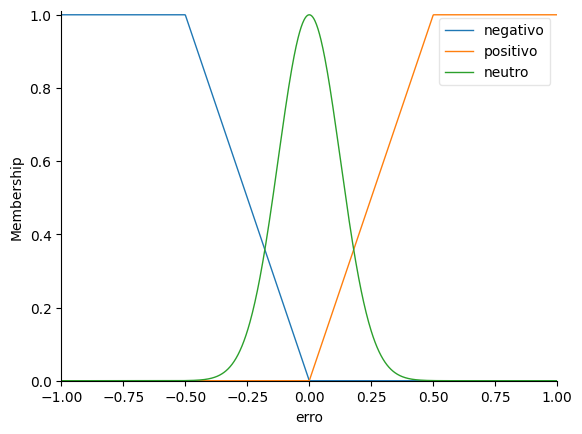

In [ ]:
lim = 1
erro = control.Antecedent(np.linspace(-lim,lim,1000),'erro')

erro['negativo'] = fuzz.trapmf(erro.universe,[-lim, -lim,-lim/2,0])
erro['positivo'] = fuzz.trapmf(erro.universe,[0, lim/2,lim,lim])
erro['neutro'] = fuzz.gaussmf(erro.universe,0,lim/8)

erro.view()

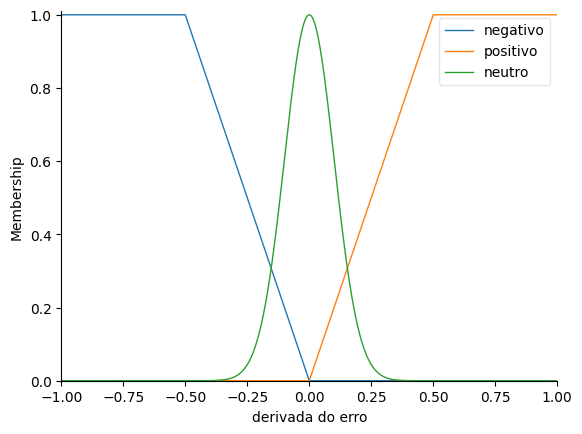

In [ ]:
lim = 1
derro = control.Antecedent(np.linspace(-lim,lim,1000),'derivada do erro')

derro['negativo'] = fuzz.trapmf(derro.universe,[-lim, -lim,-lim/2,0])
derro['positivo'] = fuzz.trapmf(derro.universe,[0, lim/2,lim,lim])
derro['neutro'] = fuzz.gaussmf(derro.universe,-0,lim/10)

derro.view()

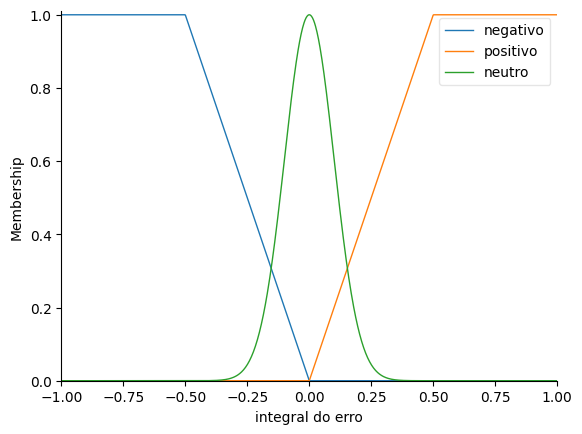

In [ ]:
lim = 1
integral_erro = control.Antecedent(np.linspace(-lim,lim,1000),'integral do erro')

integral_erro['negativo'] = fuzz.trapmf(integral_erro.universe,[-lim, -lim,-lim/2,0])
integral_erro['positivo'] = fuzz.trapmf(integral_erro.universe,[0, lim/2,lim,lim])
integral_erro['neutro'] = fuzz.gaussmf(integral_erro.universe,-0,lim/10)

integral_erro.view()

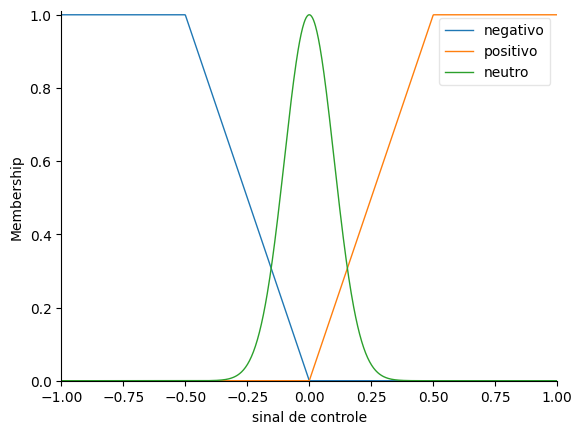

In [ ]:
lim = 1
u = control.Consequent(np.linspace(-lim,lim,1000),'sinal de controle')

u['negativo'] = fuzz.trapmf(u.universe,[-lim, -lim,-lim/2,0])
u['positivo'] = fuzz.trapmf(u.universe,[0, lim/2,lim,lim])
u['neutro'] = fuzz.gaussmf(u.universe,0,lim/10)


u.view()

In [ ]:
# Definição das regras de controle fuzzy

# regra1 = control.Rule((erro['positivo'] & derro['positivo']) |
#                       (erro['neutro'] & derro['positivo']) |
#                       (erro['positivo'] & derro['neutro']) |
#                       (erro['positivo'] & derro['positivo']),
#                       u['positivo'])

# regra2 = control.Rule((erro['negativo'] & derro['neutro']) |
#                       (erro['neutro'] & derro['negativo']) |
#                       (erro['negativo'] & derro['negativo']) |
#                       (erro['negativo'] & derro['positivo']),
#                       u['negativo'])

# regra3 = control.Rule((erro['neutro'] & derro['neutro']) |
#                       (erro['positivo'] & derro['neutro']) |
#                       (erro['neutro'] & derro['positivo']),
#                       u['neutro'])

regra1 = control.Rule(erro['positivo'],  u['positivo'])

regra2 = control.Rule(erro['negativo'],u['negativo'])

regra3 = control.Rule(erro['neutro'],u['neutro'])

# Criação do sistema de controle fuzzy
system = control.ControlSystem([regra1,regra2,regra3])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

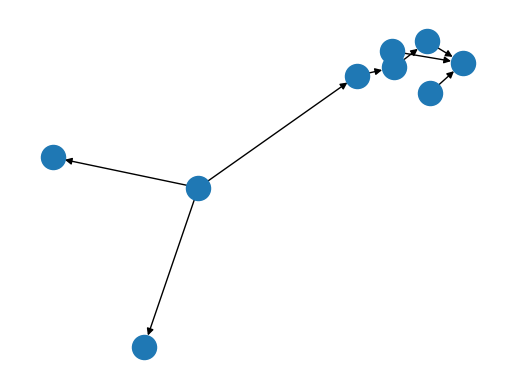

In [ ]:
regra1.view()

Saida do sinal de controle é: -5.574130713963267e-18


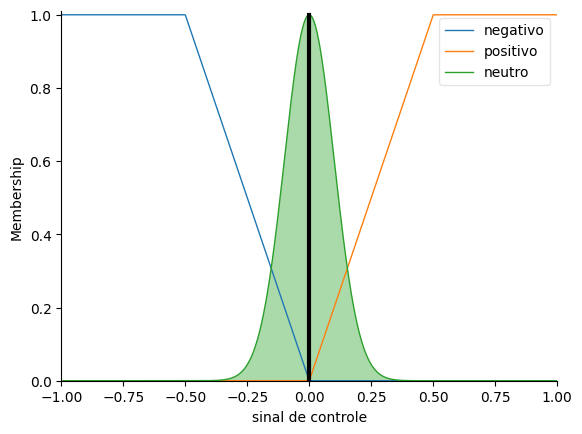

In [ ]:
system_fuzzy = control.ControlSystemSimulation(system)

system_fuzzy.input['erro'] = 0
# system_fuzzy.input['integral do erro'] = 0
#system_fuzzy.input['derivada do erro'] = 0
system_fuzzy.compute()

u.view(sim=system_fuzzy)
output = system_fuzzy.output['sinal de controle']
print(f'Saida do sinal de controle é: {output}')

**CONTROLADOR NEBULOSO TIPO INTEGRAL**

entrada: erro e saída: variação da ação de controle


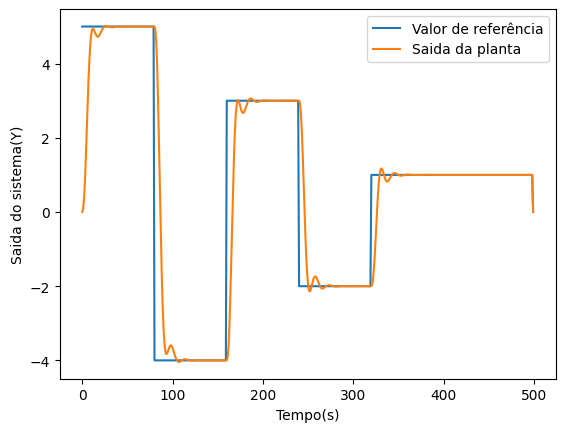

In [ ]:
k = 500
y_ref = np.zeros(k)
u = np.zeros(k)
e = np.zeros(k)
derivada_erro = np.zeros(k)
integral_erro = np.zeros(k)
time = np.arange(0,k)
y = np.zeros(k)

kc = 0.25 # Sinal de controle
kp = 0.011 # erro

kd = 1 # derivada do erro
for x in range(k -1):
  if(x < 80):
    y_ref[x] = 5
  elif(x < 160):
    y_ref[x] = -4
  elif(x < 240):
    y_ref[x] = 3
  elif(x < 320):
    y_ref[x] = -2
  elif(x >= 320):
    y_ref[x] = 1

  y[x] =1.4* y[x-1] - 0.6* y[x-2] - 3*u[x-1]**3 + 2*u[x-1] - u[x-2]**3 + 2*u[x-2];
  e[x] = kp*(y_ref[x] - y[x])

  derivada_erro[x] = kd*np.divide(e[x] - e[x-1], time[x] - time[x-1])
  integral_erro[x] = ki*(integral_erro[x-1] + e[x])
  #system_fuzzy.input['derivada do erro'] = derivada_erro[x]
  #system_fuzzy.input['integral do erro'] = integral_erro[x]
  system_fuzzy.input['erro'] = e[x]
  system_fuzzy.compute()

  u[x] = kc*system_fuzzy.output['sinal de controle'] + u[x-1]

plt.figure()
plt.plot(y_ref,label='Valor de referência')
plt.ylabel('Saida do sistema(Y)')
plt.xlabel('Tempo(s)')
#plt.figure()
plt.plot(y,label='Saida da planta')

plt.legend()

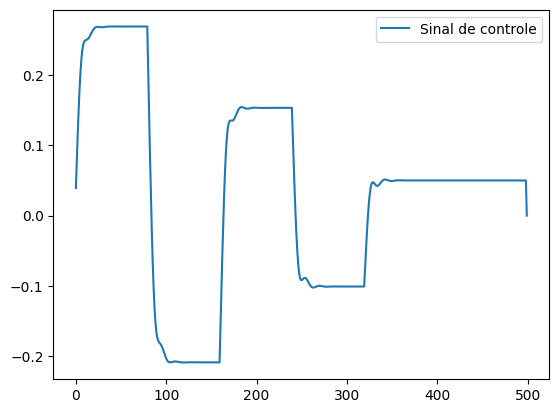

In [ ]:
plt.plot(u,label='Sinal de controle')
plt.legend()

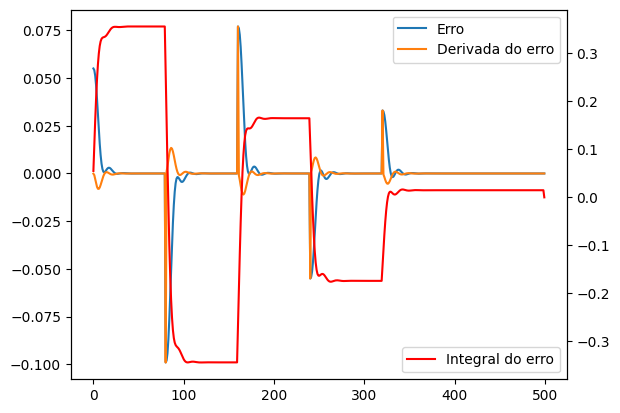

In [ ]:
_,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(e,label='Erro')
ax1.plot(derivada_erro,label='Derivada do erro')
ax2.plot(integral_erro,label='Integral do erro',color='r')
plt.xlabel('Tempo')
ax1.legend()
ax2.legend(loc='lower right')

**CONTROLADOR P NEBULOSO**

entrada: erro e saída: a ação de controle


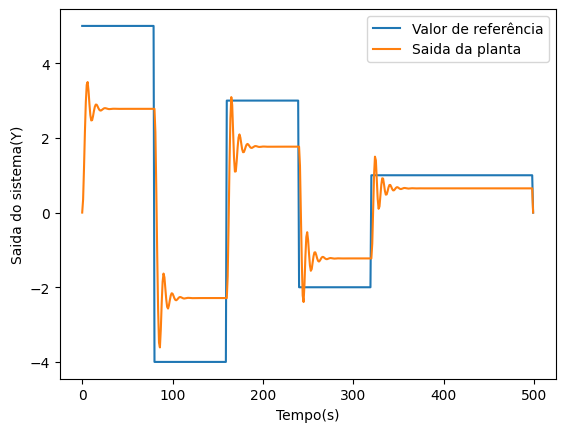

In [ ]:
k = 500
y_ref = np.zeros(k)
u = np.zeros(k)
e = np.zeros(k)
derivada_erro = np.zeros(k)
integral_erro = np.zeros(k)
time = np.arange(0,k)
y = np.zeros(k)

kc = 0.3 # saida de controle
kp = 0.1 # Erro

kd = 1
for x in range(k -1):
  if(x < 80):
    y_ref[x] = 5
  elif(x < 160):
    y_ref[x] = -4
  elif(x < 240):
    y_ref[x] = 3
  elif(x < 320):
    y_ref[x] = -2
  elif(x >= 320):
    y_ref[x] = 1

  y[x] =1.4* y[x-1] - 0.6* y[x-2] - 3*u[x-1]**3 + 2*u[x-1] - u[x-2]**3 + 2*u[x-2];
  e[x] = kp*(y_ref[x] - y[x])

  derivada_erro[x] = kd*np.divide(e[x] - e[x-1], time[x] - time[x-1])
  integral_erro[x] = ki*(integral_erro[x-1] + e[x])
  #system_fuzzy.input['derivada do erro'] = derivada_erro[x]
  #system_fuzzy.input['integral do erro'] = integral_erro[x]
  system_fuzzy.input['erro'] = e[x]
  system_fuzzy.compute()

  u[x] = kc*system_fuzzy.output['sinal de controle']

plt.figure()
plt.plot(y_ref,label='Valor de referência')
plt.ylabel('Saida do sistema(Y)')
plt.xlabel('Tempo(s)')
#plt.figure()
plt.plot(y,label='Saida da planta')

plt.legend()

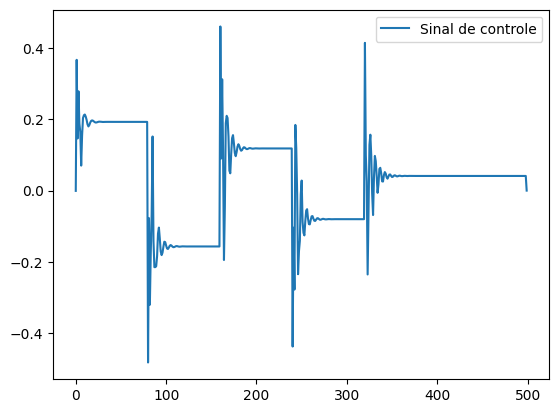

In [ ]:
plt.plot(u,label='Sinal de controle')
plt.legend()

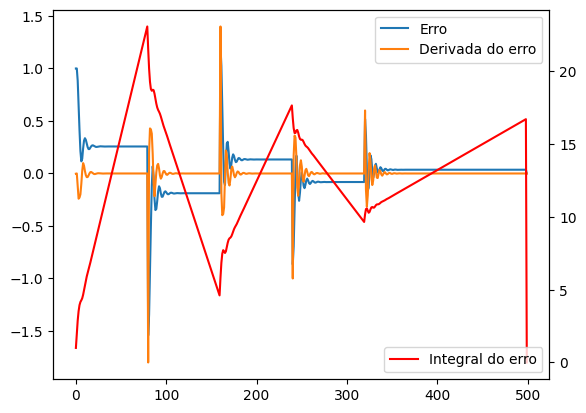

In [ ]:
_,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(e,label='Erro')
ax1.plot(derivada_erro,label='Derivada do erro')
ax2.plot(integral_erro,label='Integral do erro',color='r')
plt.xlabel('Tempo')
ax1.legend()
ax2.legend(loc='lower right')